# Part 2: Advanced Data Visualization

This phase focuses on enhancing the dataset by creating meaningful features that capture **temporal patterns, store-specific behaviors, and promotional effects**. It also includes **visual exploration to uncover trends, seasonality, and anomalies—laying** the groundwork for robust forecasting models.


## 1. Setup & Imports Libraries
-------------------------------

In [1]:
import time 

In [2]:
# Step 1: Setup & Imports Libraries
print("Step 1: Setup and Import Libraries started...")
time.sleep(1)  # Simulate processing time

Step 1: Setup and Import Libraries started...


In [3]:
# Data Manipulation & Processing
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime
from sklearn.preprocessing import *

# Data Visualization
import seaborn as sbn
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandas.plotting import scatter_matrix

from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

sbn.set(rc={'figure.figsize':(14,6)})
plt.style.use('seaborn-v0_8')
sbn.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [4]:
print("="*60)
print("Rossman Store Sales Time Series Analysis - Part 2")
print("="*60)
print("All libraries imported successfully!")
print("Analysis Date:", pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'))


Rossman Store Sales Time Series Analysis - Part 2
All libraries imported successfully!
Analysis Date: 2025-08-11 00:38:47


In [5]:
print("✅ Setup and Import Liraries completed.\n")

✅ Setup and Import Liraries completed.



In [6]:
# Start analysis
part_2_begin = pd.Timestamp.now()

bold_start = '\033[1m'
bold_end = '\033[0m'

print("🔍 Part 2 Started ...")
print(f"🟢 Begin Date: {bold_start}{part_2_begin.strftime('%Y-%m-%d %H:%M:%S')}{bold_end}\n")

🔍 Part 2 Started ...
🟢 Begin Date: 2025-08-11 00:38:47




## Restore the file
----------------------------

In [7]:
%store -r df_features

### View or Display Dataset

In [8]:
df_features.head()

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,isholiday,isschoolDay,day,week,month,quarter,year,isweekend
982643,1115,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982640,1112,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982639,1111,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982638,1110,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False
982637,1109,2,2013-01-01,0,0,0,No Promo,Public,1,True,False,Tue,1,Jan,1,2013,False


In [9]:
print("✅ Data Engineering completed.\n")

✅ Data Engineering completed.



## Correlation Analysis

In [10]:

def enhanced_correlation_analysis(df, target_col='sales', figsize=(16, 12)):
    """
    Comprehensive correlation analysis with business insights
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    target_col : str
        Primary variable of interest (usually 'sales')
    figsize : tuple
        Figure size for plots
    """
    
    # Get numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove redundant or non-meaningful columns
    exclude_patterns = ['unnamed', 'index', 'id', 'level_0']
    numeric_cols = [col for col in numeric_cols if not any(pattern in col.lower() for pattern in exclude_patterns)]
    
    print(f"🔍 CORRELATION ANALYSIS")
    print(f"="*50)
    print(f"📊 Analyzing {len(numeric_cols)} numeric variables")
    print(f"🎯 Primary target: {target_col}")
    print(f"📋 Variables: {numeric_cols}")
    
    # Calculate correlation matrix
    corr_data = df[numeric_cols].corr()
    
    # Create enhanced visualizations
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[2, 1, 1], 
                         hspace=0.3, wspace=0.3)
    
    # 1. Main correlation heatmap
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_data, dtype=bool))
    
    # Custom colormap
    cmap = sbn.diverging_palette(230, 20, as_cmap=True)
    
    # Create heatmap
    sbn.heatmap(corr_data, 
                mask=mask,
                annot=True, 
                cmap=cmap,
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8},
                ax=ax1,
                annot_kws={'size': 9})
    
    ax1.set_title('📊 Correlation Matrix Heatmap\n(Lower Triangle Only)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    
    # Rotate labels for better readability
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax1.get_yticklabels(), rotation=0)
    
    # 2. Target variable correlations (sorted)
    ax2 = fig.add_subplot(gs[0, 1])
    
    if target_col in corr_data.columns:
        target_corr = corr_data[target_col].drop(target_col).sort_values(key=abs, ascending=True)
        
        # Color bars based on correlation strength
        colors = ['red' if x < -0.5 else 'orange' if x < -0.2 else 
                 'lightgray' if abs(x) < 0.2 else 'lightblue' if x < 0.5 else 'green' 
                 for x in target_corr.values]
        
        bars = ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
        ax2.set_yticks(range(len(target_corr)))
        ax2.set_yticklabels([f'{label}' for label in target_corr.index], fontsize=9)
        ax2.set_xlabel('Correlation with Sales')
        ax2.set_title(f'🎯 Correlations with {target_col.title()}\n(Sorted by Strength)', 
                     fontsize=12, fontweight='bold')
        ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        ax2.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, target_corr.values)):
            ax2.text(value + (0.02 if value > 0 else -0.02), i, f'{value:.2f}', 
                    va='center', ha='left' if value > 0 else 'right', fontsize=8)
    
    # 3. Correlation strength distribution
    ax3 = fig.add_subplot(gs[0, 2])
    
    # Get upper triangle correlations (excluding diagonal)
    upper_tri = corr_data.where(np.triu(np.ones(corr_data.shape), k=1).astype(bool))
    correlations = upper_tri.stack().values
    
    # Create histogram
    ax3.hist(correlations, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax3.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero Correlation')
    ax3.axvline(x=correlations.mean(), color='orange', linestyle='--', alpha=0.7, 
               label=f'Mean: {correlations.mean():.2f}')
    ax3.set_xlabel('Correlation Coefficient')
    ax3.set_ylabel('Frequency')
    ax3.set_title('📈 Distribution of\nCorrelation Coefficients', fontsize=12, fontweight='bold')
    ax3.legend(fontsize=8)
    ax3.grid(alpha=0.3)
    
    # 4. Strong correlations table
    ax4 = fig.add_subplot(gs[1, :])
    ax4.axis('off')
    
    # Find strong correlations (|r| > 0.5)
    strong_corr = []
    for i in range(len(corr_data.columns)):
        for j in range(i+1, len(corr_data.columns)):
            corr_val = corr_data.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append({
                    'Variable 1': corr_data.columns[i],
                    'Variable 2': corr_data.columns[j],
                    'Correlation': corr_val,
                    'Strength': 'Very Strong' if abs(corr_val) > 0.8 else 'Strong'
                })
    
    if strong_corr:
        strong_df = pd.DataFrame(strong_corr)
        strong_df = strong_df.sort_values('Correlation', key=abs, ascending=False)
        
        # Create table with better spacing and positioning
        table_data = []
        for _, row in strong_df.head(6).iterrows():  # Show top 6 to avoid crowding
            # Truncate long variable names
            var1 = row['Variable 1'][:15] + '...' if len(row['Variable 1']) > 15 else row['Variable 1']
            var2 = row['Variable 2'][:15] + '...' if len(row['Variable 2']) > 15 else row['Variable 2']
            
            table_data.append([
                var1, 
                var2, 
                f"{row['Correlation']:.3f}",
                row['Strength']
            ])
        
        table = ax4.table(cellText=table_data,
                         colLabels=['Variable 1', 'Variable 2', 'Correlation', 'Strength'],
                         cellLoc='center',
                         loc='upper center',  # Changed position
                         colWidths=[0.28, 0.28, 0.18, 0.18],  # Slightly wider columns
                         bbox=[0.05, 0.15, 0.9, 0.7])  # Larger table area
        table.auto_set_font_size(False)
        table.set_fontsize(10)  # Increased font size
        table.scale(1, 1.8)  # Increased scaling for better readability
        
        # Style the header
        for j in range(4):
            table[(0, j)].set_facecolor('#4472C4')
            table[(0, j)].set_text_props(weight='bold', color='white')
            table[(0, j)].set_height(0.12)  # Taller header
        
        # Color code the data rows
        for i in range(len(table_data)):
            corr_val = float(table_data[i][2])
            if abs(corr_val) > 0.8:
                color = '#ffcccc' if corr_val < 0 else '#ccffcc'
            else:
                color = '#ffe6cc' if corr_val < 0 else '#e6f3ff'
            
            for j in range(4):
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_height(0.10)  # Taller data cells
        
        # Position title better
        ax4.text(0.5, 0.95, '🔍 Strong Correlations (|r| > 0.5)', 
                ha='center', va='top', fontsize=12, fontweight='bold',
                transform=ax4.transAxes)
    else:
        ax4.text(0.5, 0.5, 'No strong correlations found (|r| > 0.5)', 
                ha='center', va='center', fontsize=12, style='italic',
                transform=ax4.transAxes)
        ax4.text(0.5, 0.9, '🔍 Strong Correlations', 
                ha='center', va='top', fontsize=12, fontweight='bold',
                transform=ax4.transAxes)
    
    # 5. Business insights text
    ax5 = fig.add_subplot(gs[2, :])
    ax5.axis('off')
    
    # Generate insights
    insights = []
    
    if target_col in corr_data.columns:
        target_correlations = corr_data[target_col].drop(target_col)
        
        # Strongest positive correlation
        max_pos = target_correlations.max()
        max_pos_var = target_correlations.idxmax()
        
        # Strongest negative correlation  
        max_neg = target_correlations.min()
        max_neg_var = target_correlations.idxmin()
        
        # Count significant correlations
        significant_count = (abs(target_correlations) > 0.3).sum()
        
        insights.append(f"🎯 SALES DRIVERS: '{max_pos_var}' has the strongest positive relationship with sales (r={max_pos:.3f})")
        
        if max_neg < -0.2:
            insights.append(f"⚠️  NEGATIVE FACTOR: '{max_neg_var}' shows negative correlation with sales (r={max_neg:.3f})")
        
        insights.append(f"📊 SIGNIFICANCE: {significant_count}/{len(target_correlations)} variables show meaningful correlation with sales (|r|>0.3)")
        
        if len(strong_corr) > 0:
            insights.append(f"🔗 MULTICOLLINEARITY: Found {len(strong_corr)} strong inter-variable relationships - consider for feature selection")
        
        # Interpretation guide
        insights.append(f"📈 INTERPRETATION: |r| > 0.7 (Strong), |r| 0.3-0.7 (Moderate), |r| < 0.3 (Weak)")
    
    # Display insights
    insight_text = '\n'.join(insights)
    ax5.text(0.05, 0.95, '💡 KEY INSIGHTS:', fontsize=12, fontweight='bold', 
            transform=ax5.transAxes, va='top')
    ax5.text(0.05, 0.85, insight_text, fontsize=10, transform=ax5.transAxes, 
            va='top', wrap=True, linespacing=1.5)
    
    plt.suptitle('🔍 COMPREHENSIVE CORRELATION ANALYSIS', fontsize=16, fontweight='bold', y=0.98)
    
    # Print detailed analysis
    print(f"\n📋 DETAILED CORRELATION ANALYSIS")
    print(f"="*50)
    
    if target_col in corr_data.columns:
        print(f"\n🎯 TOP CORRELATIONS WITH {target_col.upper()}:")
        target_sorted = corr_data[target_col].drop(target_col).sort_values(key=abs, ascending=False)
        for var, corr in target_sorted.head(5).items():
            strength = "Very Strong" if abs(corr) > 0.8 else "Strong" if abs(corr) > 0.6 else "Moderate" if abs(corr) > 0.3 else "Weak"
            direction = "Positive" if corr > 0 else "Negative"
            print(f"   {var:15} | {corr:+.3f} | {strength:12} | {direction}")
    
    if strong_corr:
        print(f"\n🔗 STRONG INTER-VARIABLE CORRELATIONS:")
        for item in strong_df.head(5).to_dict('records'):
            print(f"   {item['Variable 1']} ↔ {item['Variable 2']}: {item['Correlation']:+.3f} ({item['Strength']})")
    
    print(f"\n📊 SUMMARY STATISTICS:")
    print(f"   • Mean correlation: {correlations.mean():.3f}")
    print(f"   • Std correlation: {correlations.std():.3f}")
    print(f"   • Max correlation: {correlations.max():.3f}")
    print(f"   • Min correlation: {correlations.min():.3f}")
    print(f"   • Strong correlations (|r|>0.5): {len(strong_corr)}")
    
    plt.tight_layout()
    plt.show()
    
    # Return analysis results
    return {
        'correlation_matrix': corr_data,
        'target_correlations': corr_data[target_col].drop(target_col).sort_values(key=abs, ascending=False) if target_col in corr_data.columns else None,
        'strong_correlations': pd.DataFrame(strong_corr) if strong_corr else pd.DataFrame(),
        'summary_stats': {
            'mean_correlation': correlations.mean(),
            'std_correlation': correlations.std(),
            'max_correlation': correlations.max(),
            'min_correlation': correlations.min(),
            'strong_count': len(strong_corr)
        }
    }

def correlation_feature_selector(df, target_col='sales', threshold=0.3, remove_multicollinear=True):
    """
    Select features based on correlation analysis
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    target_col : str
        Target variable
    threshold : float
        Minimum correlation threshold with target
    remove_multicollinear : bool
        Whether to remove highly correlated features
    """
    
    print(f"🎯 FEATURE SELECTION BASED ON CORRELATION")
    print(f"="*50)
    
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if target_col not in numeric_cols:
        print(f"❌ Error: {target_col} not found in numeric columns")
        return None
    
    # Calculate correlations with target
    corr_matrix = df[numeric_cols].corr()
    target_corr = corr_matrix[target_col].drop(target_col)
    
    # Select features based on correlation threshold
    selected_features = target_corr[abs(target_corr) >= threshold].index.tolist()
    
    print(f"📊 Initial features meeting threshold (|r| >= {threshold}): {len(selected_features)}")
    for feat in selected_features:
        print(f"   {feat:20} | {target_corr[feat]:+.3f}")
    
    if remove_multicollinear and len(selected_features) > 1:
        print(f"\n🔗 Checking for multicollinearity...")
        
        # Check correlations among selected features
        selected_corr = corr_matrix.loc[selected_features, selected_features]
        
        # Remove highly correlated features (keep the one most correlated with target)
        to_remove = set()
        
        for i in range(len(selected_features)):
            for j in range(i+1, len(selected_features)):
                feat1, feat2 = selected_features[i], selected_features[j]
                
                if abs(selected_corr.loc[feat1, feat2]) > 0.8:  # High correlation threshold
                    # Keep the feature more correlated with target
                    if abs(target_corr[feat1]) >= abs(target_corr[feat2]):
                        to_remove.add(feat2)
                        print(f"   Removing {feat2} (corr with {feat1}: {selected_corr.loc[feat1, feat2]:.3f})")
                    else:
                        to_remove.add(feat1)
                        print(f"   Removing {feat1} (corr with {feat2}: {selected_corr.loc[feat1, feat2]:.3f})")
        
        # Final feature list
        final_features = [f for f in selected_features if f not in to_remove]
        print(f"\n✅ Final selected features: {len(final_features)}")
        for feat in final_features:
            print(f"   {feat:20} | {target_corr[feat]:+.3f}")
        
        return final_features
    
    return selected_features

# Feature selection based on correlation
important_features = correlation_feature_selector(df_features, target_col='sales', threshold=0.3)

🎯 FEATURE SELECTION BASED ON CORRELATION
📊 Initial features meeting threshold (|r| >= 0.3): 3
   dayofweek            | -0.461
   customers            | +0.896
   open                 | +0.679

🔗 Checking for multicollinearity...

✅ Final selected features: 3
   dayofweek            | -0.461
   customers            | +0.896
   open                 | +0.679


### Enhnaced Correlation analysis

🔍 CORRELATION ANALYSIS
📊 Analyzing 8 numeric variables
🎯 Primary target: sales
📋 Variables: ['store', 'dayofweek', 'sales', 'customers', 'open', 'week', 'quarter', 'year']

📋 DETAILED CORRELATION ANALYSIS

🎯 TOP CORRELATIONS WITH SALES:
   customers       | +0.896 | Very Strong  | Positive
   open            | +0.679 | Strong       | Positive
   dayofweek       | -0.461 | Moderate     | Negative
   week            | +0.052 | Weak         | Positive
   quarter         | +0.043 | Weak         | Positive

🔗 STRONG INTER-VARIABLE CORRELATIONS:
   week ↔ quarter: +0.942 (Very Strong)
   sales ↔ customers: +0.896 (Very Strong)
   sales ↔ open: +0.679 (Strong)
   customers ↔ open: +0.618 (Strong)
   dayofweek ↔ open: -0.527 (Strong)

📊 SUMMARY STATISTICS:
   • Mean correlation: 0.049
   • Std correlation: 0.343
   • Max correlation: 0.942
   • Min correlation: -0.527
   • Strong correlations (|r|>0.5): 5


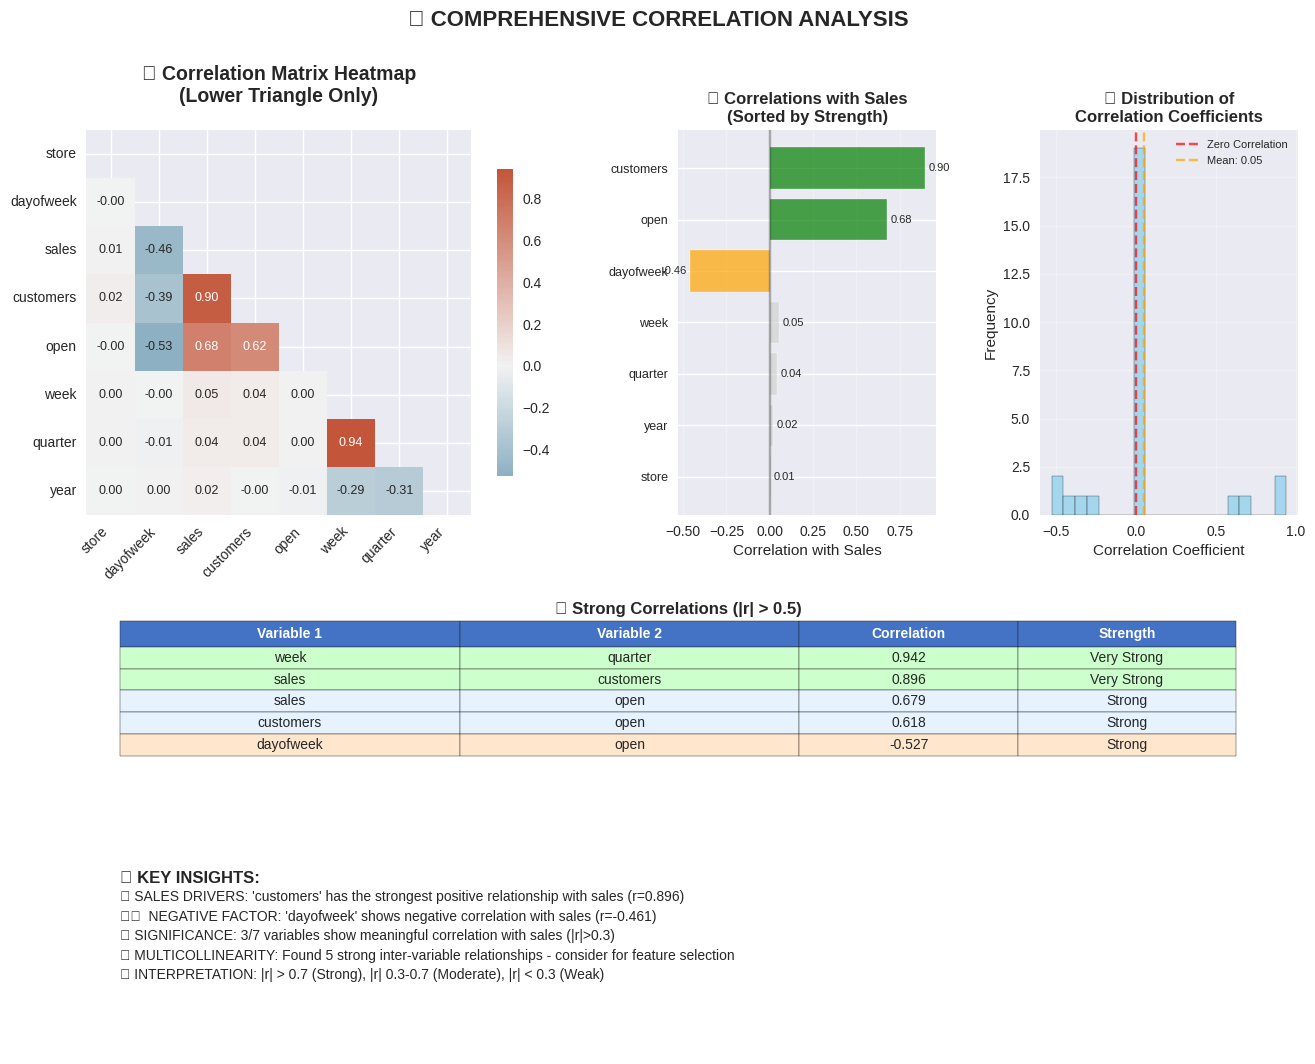

In [11]:
# Enhanced correlation analysis
results = enhanced_correlation_analysis(df_features, target_col='sales')

# Focused correlation matrix with only important features

🔍 CORRELATION ANALYSIS
📊 Analyzing 4 numeric variables
🎯 Primary target: sales
📋 Variables: ['dayofweek', 'customers', 'open', 'sales']

📋 DETAILED CORRELATION ANALYSIS

🎯 TOP CORRELATIONS WITH SALES:
   customers       | +0.896 | Very Strong  | Positive
   open            | +0.679 | Strong       | Positive
   dayofweek       | -0.461 | Moderate     | Negative

🔗 STRONG INTER-VARIABLE CORRELATIONS:
   customers ↔ sales: +0.896 (Very Strong)
   open ↔ sales: +0.679 (Strong)
   customers ↔ open: +0.618 (Strong)
   dayofweek ↔ open: -0.527 (Strong)

📊 SUMMARY STATISTICS:
   • Mean correlation: 0.136
   • Std correlation: 0.602
   • Max correlation: 0.896
   • Min correlation: -0.527
   • Strong correlations (|r|>0.5): 4


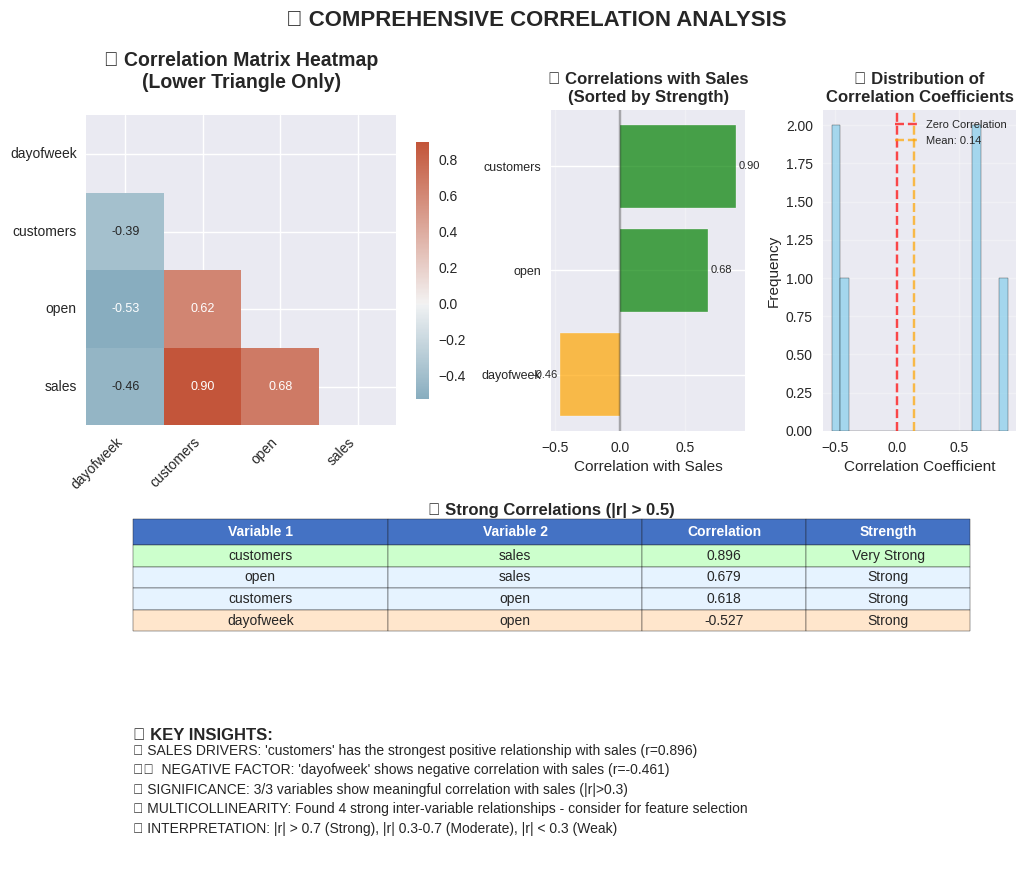

In [12]:
# Focused correlation matrix with only important features
if important_features:
    important_features.append('sales')  # Add target back
    focused_results = enhanced_correlation_analysis(df_features[important_features], target_col='sales', figsize=(12, 10))

### 3.2 Percentage Distribution per Holiday Type

In [13]:

# Get value counts efficiently
value_counts = df_features['stateholiday'].value_counts()
values = value_counts.values
labels = value_counts.index.tolist()

# Use original labels since holidaytype is already mapped from stateholiday
readable_labels = [str(label) for label in labels]

# Create pie chart with enhanced styling
fig = go.Figure(data=go.Pie(
    values=values,
    labels=readable_labels,
    pull=[0.1 if i == 0 else 0 for i in range(len(values))],  # Explode largest slice
    hole=0.3,  # Donut chart for better readability
    textinfo='label+percent',
    textposition='outside',
    textfont=dict(size=10),
    insidetextorientation='radial',
    marker=dict(
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'],
        line=dict(color='#FFFFFF', width=2)
    )
))

# Enhanced layout
fig.update_layout(
    title={
        'text': 'Holiday Type Distribution',
        'x': 0.02,  # Position on the left side
        'xanchor': 'left',
        'y': 0.95,  # Position at the top
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    font=dict(size=12),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.01
    ),
    margin=dict(t=80, b=60, l=80, r=180),
    width=800,
    height=500
)

# Add summary statistics positioned to avoid obstruction
total_records = len(df_features)
holiday_records = len(df_features[df_features['stateholiday'] != 0])
holiday_percentage = (holiday_records / total_records) * 100

fig.add_annotation(
    text=f"Total Records: {total_records:,}<br>Holiday Records: {holiday_records:,} ({holiday_percentage:.1f}%)",
    xref="paper", yref="paper",
    x=0.02, y=0.02,  # Bottom left corner
    showarrow=False,
    font=dict(size=10, color="gray"),
    align="left",
    bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent background
    bordercolor="gray",
    borderwidth=1
)

fig.show()

# Display value counts for reference
print("\nHoliday Type Value Counts:")
print("-" * 30)
for label, count in zip(readable_labels, values):
    percentage = (count / total_records) * 100
    print(f"{label}: {count:,} ({percentage:.2f}%)")
print(f"\nTotal: {total_records:,} records")


Holiday Type Value Counts:
------------------------------
Normal Day: 951,594 (96.84%)
Public: 20,260 (2.06%)
Easter: 6,690 (0.68%)
Christmas: 4,100 (0.42%)

Total: 982,644 records


### 3.3 Percentage Distribution per School Holiday

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Get value counts and create labels more efficiently
value_counts = df_features['schoolholiday'].value_counts()
values = value_counts.values
labels = ['School Holiday' if x == 1 else 'No School Holiday' for x in value_counts.index]

# Create pie chart with improved styling
fig = go.Figure(data=go.Pie(
    values=values,
    labels=labels,
    pull=[0.1, 0],  # Explode first slice
    hole=0.3,  # Creates a donut chart for better readability
    textinfo='label+percent',
    textposition='auto',
    marker=dict(
        colors=['#FF6B6B', '#4ECDC4'],  # Custom colors
        line=dict(color='#FFFFFF', width=2)
    )
))

# Enhanced layout with better formatting
fig.update_layout(
    title={
        'text': 'School Holiday Distribution',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    font=dict(size=12),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.01
    ),
    margin=dict(t=60, b=40, l=40, r=120),
    width=600,
    height=400
)

# Add annotations for better context
total_records = len(df_features)
fig.add_annotation(
    text=f"Total Records: {total_records:,}",
    xref="paper", yref="paper",
    x=0.5, y=-0.1,
    showarrow=False,
    font=dict(size=10, color="gray")
)

fig.show()

### 3.4 Sales Distribution

In [15]:

# Create histogram bins more efficiently
max_sales = df_features['sales'].max()
bin_width = 550
bins = np.arange(0, max_sales + bin_width, bin_width)

# Calculate histogram
counts, bin_edges = np.histogram(df_features['sales'], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create improved bar chart
fig = px.bar(
    x=bin_centers, 
    y=counts,
    labels={
        'x': 'Sales Value', 
        'y': 'Frequency',
        'color': 'Count'
    },
    title='Sales Distribution',
    color=counts,  # Color gradient based on frequency
    color_continuous_scale='viridis'
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Sales Distribution Analysis',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Sales Value',
    yaxis_title='Frequency',
    bargap=0.02,  # Minimal gap for histogram effect
    font=dict(size=12),
    plot_bgcolor='white',
    width=1300,
    height=600,
    margin=dict(t=80, b=60, l=60, r=60),
    # FIXED: Proper axis formatting for px.bar figures
    xaxis=dict(
        tickformat=',',  # Add thousands separator
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
)

# Improve trace styling
fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white'
)

# Add statistical annotations
mean_sales = df_features['sales'].mean()
median_sales = df_features['sales'].median()
std_sales = df_features['sales'].std()

fig.add_annotation(
    text=f"Mean: {mean_sales:,.0f}<br>Median: {median_sales:,.0f}<br>Std Dev: {std_sales:,.0f}",
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    xanchor="right", yanchor="top",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

# Add vertical lines for mean and median
fig.add_vline(
    x=mean_sales, 
    line_dash="dash", 
    line_color="red",
    annotation_text="Mean",
    annotation_position="top"
)

fig.add_vline(
    x=median_sales, 
    line_dash="dot", 
    line_color="blue",
    annotation_text="Median",
    annotation_position="top"
)

fig.show()

# Print summary statistics
print("\nSales Distribution Summary:")
print("-" * 40)
print(f"Total Records: {len(df_features):,}")
print(f"Min Sales: {df_features['sales'].min():,}")
print(f"Max Sales: {df_features['sales'].max():,}")
print(f"Mean Sales: {mean_sales:,.2f}")
print(f"Median Sales: {median_sales:,.2f}")
print(f"Standard Deviation: {std_sales:,.2f}")
print(f"Bin Width: {bin_width}")
print(f"Number of Bins: {len(counts)}")


Sales Distribution Summary:
----------------------------------------
Total Records: 982,644
Min Sales: 0
Max Sales: 41,551
Mean Sales: 5,760.84
Median Sales: 5,731.00
Standard Deviation: 3,857.57
Bin Width: 550
Number of Bins: 76


### 3.4 Customers Distribution

In [16]:
# Create histogram bins more efficiently
max_sales = df_features['customers'].max()
bin_width = 50
bins = np.arange(0, max_sales + bin_width, bin_width)

# Calculate histogram
counts, bin_edges = np.histogram(df_features['customers'], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create improved bar chart
fig = px.bar(
    x=bin_centers, 
    y=counts,
    labels={
        'x': 'Customers Value', 
        'y': 'Frequency',
        'color': 'Count'
    },
    title='Customers Distribution',
    color=counts,  # Color gradient based on frequency
    color_continuous_scale='viridis'
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Customers Distribution Analysis',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Customers Value',
    yaxis_title='Frequency',
    bargap=0.02,  # Minimal gap for histogram effect
    font=dict(size=12),
    plot_bgcolor='white',
    width=1050,
    height=400,
    margin=dict(t=80, b=60, l=60, r=60),
    # FIXED: Proper axis formatting for px.bar figures
    xaxis=dict(
        tickformat=',',  # Add thousands separator
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
)

# Improve trace styling
fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='white'
)

# Add statistical annotations
mean_sales = df_features['customers'].mean()
median_sales = df_features['customers'].median()
std_sales = df_features['customers'].std()

fig.add_annotation(
    text=f"Mean: {mean_sales:,.0f}<br>Median: {median_sales:,.0f}<br>Std Dev: {std_sales:,.0f}",
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    xanchor="right", yanchor="top",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

# Add vertical lines for mean and median
fig.add_vline(
    x=mean_sales, 
    line_dash="dash", 
    line_color="red",
    annotation_text="Mean",
    annotation_position="top"
)

fig.add_vline(
    x=median_sales, 
    line_dash="dot", 
    line_color="blue",
    annotation_text="Median",
    annotation_position="top"
)

fig.show()

# Print summary statistics
print("\nCustomers Distribution Summary:")
print("-" * 40)
print(f"Total Records: {len(df_features):,}")
print(f"Min Customers: {df_features['customers'].min():,}")
print(f"Max Customers: {df_features['customers'].max():,}")
print(f"Mean Customers: {mean_sales:,.2f}")
print(f"Median Customers: {median_sales:,.2f}")
print(f"Standard Deviation: {std_sales:,.2f}")
print(f"Bin Width: {bin_width}")
print(f"Number of Bins: {len(counts)}")


Customers Distribution Summary:
----------------------------------------
Total Records: 982,644
Min Customers: 0
Max Customers: 7,388
Mean Customers: 632.77
Median Customers: 609.00
Standard Deviation: 465.40
Bin Width: 50
Number of Bins: 148


## 3.6 Customer Analysis

#### Average Customers Trend per Day

In [17]:

# Define weekday order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Calculate mean customers by day
dow_agg = df_features.groupby('day', as_index=False)[['customers']].mean()

# Apply categorical ordering
dow_agg['day'] = pd.Categorical(dow_agg['day'], categories=weekday_order, ordered=True)
dow_agg = dow_agg.sort_values('day')

# Identify peak and lowest days
peak_row = dow_agg.loc[dow_agg['customers'].idxmax()]
lowest_row = dow_agg.loc[dow_agg['customers'].idxmin()]
peak_day = peak_row['day']
peak_value = peak_row['customers']
lowest_day = lowest_row['day']
lowest_value = lowest_row['customers']

# Create enhanced line chart
fig = px.line(
    dow_agg, 
    x='day', 
    y='customers', 
    title='Average Customer Traffic by Day of Week',
    markers=True,
    line_shape='spline'  # Smooth curve
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Average Customer Traffic by Day of Week',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Day of Week',
    yaxis_title='Average Number of Customers',
    font=dict(size=12),
    plot_bgcolor='white',
    width=900,
    height=500,
    margin=dict(t=80, b=60, l=80, r=60),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    )
)

# Improve line and marker styling
fig.update_traces(
    line=dict(width=3, color='#2E8B57'),
    marker=dict(
        size=8,
        color='#FF6B6B',
        line=dict(width=2, color='white')
    )
)

# Add annotation for peak day
fig.add_annotation(
    x=peak_day,
    y=peak_value,
    text=f"Peak: {peak_day}<br>({peak_value:,.0f} customers)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-50,
    font=dict(color="red", size=11),
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="red",
    borderwidth=1
)

# Add annotation for lowest day
fig.add_annotation(
    x=lowest_day,
    y=lowest_value,
    text=f"Lowest: {lowest_day}<br>({lowest_value:,.0f} customers)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=50,
    font=dict(color="blue", size=11),
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="blue",
    borderwidth=1
)

# Add summary statistics box
avg_customers = dow_agg['customers'].mean()
std_customers = dow_agg['customers'].std()
range_customers = peak_value - lowest_value

fig.add_annotation(
    text=f"Weekly Average: {avg_customers:,.0f}<br>Standard Deviation: {std_customers:,.0f}<br>Range: {range_customers:,.0f}",
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    xanchor="right", yanchor="top",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

fig.show()

# Print detailed summary
print("\nWeekday Customer Traffic Summary:")
print("-" * 45)
for _, row in dow_agg.iterrows():
    day = row['day']
    customers = row['customers']
    percentage_of_peak = (customers / peak_value) * 100
    print(f"{day}: {customers:,.0f} customers ({percentage_of_peak:.1f}% of peak)")

print(f"\nWeekly Statistics:")
print(f"Average daily customers: {avg_customers:,.0f}")
print(f"Peak day: {peak_day} ({peak_value:,.0f} customers)")
print(f"Lowest day: {lowest_day} ({lowest_value:,.0f} customers)")
print(f"Difference (Peak - Lowest): {range_customers:,.0f} customers")


Weekday Customer Traffic Summary:
---------------------------------------------
Mon: 813 customers (100.0% of peak)
Tue: 762 customers (93.7% of peak)
Wed: 721 customers (88.7% of peak)
Thu: 696 customers (85.6% of peak)
Fri: 743 customers (91.3% of peak)
Sat: 659 customers (81.0% of peak)
Sun: 36 customers (4.4% of peak)

Weekly Statistics:
Average daily customers: 633
Peak day: Mon (813 customers)
Lowest day: Sun (36 customers)
Difference (Peak - Lowest): 777 customers


#### Average Customers Trend per Month

In [18]:
# Ensure month is ordered
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate monthly averages
monthly_grp = df_features.groupby('month', as_index=False)['customers'].mean()
monthly_grp['month'] = pd.Categorical(monthly_grp['month'], categories=month_order, ordered=True)
monthly_grp = monthly_grp.sort_values('month')

# Identify peak and lowest months
peak_row = monthly_grp.loc[monthly_grp['customers'].idxmax()]
lowest_row = monthly_grp.loc[monthly_grp['customers'].idxmin()]
peak_month = peak_row['month']
peak_value = peak_row['customers']
lowest_month = lowest_row['month']
lowest_value = lowest_row['customers']

# Create enhanced line chart
fig = px.line(
    monthly_grp, 
    x='month', 
    y='customers',
    markers=True,
    title='Average Customer Traffic by Month',
    labels={'customers': 'Average Customers', 'month': 'Month'},
    line_shape='spline'  # Smooth curves for better trend visualization
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Average Customer Traffic by Month',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Month',
    yaxis_title='Average Number of Customers',
    font=dict(size=12),
    plot_bgcolor='white',
    width=1000,
    height=550,
    margin=dict(t=80, b=60, l=80, r=80),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    )
)

# Improve line and marker styling
fig.update_traces(
    line=dict(width=3, color='#1f77b4'),
    marker=dict(
        size=10,
        color='#ff7f0e',
        line=dict(width=2, color='white')
    )
)

# Annotate peak month
fig.add_annotation(
    x=peak_month, 
    y=peak_value,
    text=f'Peak: {peak_month}<br>({peak_value:,.0f} customers)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='red',
    font=dict(color='red', size=11),
    yshift=20,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="red",
    borderwidth=1
)

# Annotate lowest month
fig.add_annotation(
    x=lowest_month, 
    y=lowest_value,
    text=f'Lowest: {lowest_month}<br>({lowest_value:,.0f} customers)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='blue',
    font=dict(color='blue', size=11),
    yshift=-30,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="blue",
    borderwidth=1
)

# Add seasonal analysis
spring_months = ['Mar', 'Apr', 'May']
summer_months = ['Jun', 'Jul', 'Aug']
fall_months = ['Sep', 'Oct', 'Nov']
winter_months = ['Dec', 'Jan', 'Feb']

spring_avg = monthly_grp[monthly_grp['month'].isin(spring_months)]['customers'].mean()
summer_avg = monthly_grp[monthly_grp['month'].isin(summer_months)]['customers'].mean()
fall_avg = monthly_grp[monthly_grp['month'].isin(fall_months)]['customers'].mean()
winter_avg = monthly_grp[monthly_grp['month'].isin(winter_months)]['customers'].mean()

# Add summary statistics
yearly_avg = monthly_grp['customers'].mean()
yearly_std = monthly_grp['customers'].std()
range_customers = peak_value - lowest_value

fig.add_annotation(
    text=f"Yearly Average: {yearly_avg:,.0f}<br>" +
         f"Standard Deviation: {yearly_std:,.0f}<br>" +
         f"Range: {range_customers:,.0f}<br><br>" +
         f"Seasonal Averages:<br>" +
         f"Spring: {spring_avg:,.0f}<br>" +
         f"Summer: {summer_avg:,.0f}<br>" +
         f"Fall: {fall_avg:,.0f}<br>" +
         f"Winter: {winter_avg:,.0f}",
    xref="paper", yref="paper",
    x=0.02, y=0.5,  # Middle left side
    xanchor="left", yanchor="middle",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

fig.show()

# Print detailed monthly summary
print("\nMonthly Customer Traffic Summary:")
print("-" * 50)
for _, row in monthly_grp.iterrows():
    month = row['month']
    customers = row['customers']
    percentage_of_peak = (customers / peak_value) * 100
    print(f"{month}: {customers:,.0f} customers ({percentage_of_peak:.1f}% of peak)")

print(f"\nYearly Statistics:")
print(f"Average monthly customers: {yearly_avg:,.0f}")
print(f"Peak month: {peak_month} ({peak_value:,.0f} customers)")
print(f"Lowest month: {lowest_month} ({lowest_value:,.0f} customers)")
print(f"Difference (Peak - Lowest): {range_customers:,.0f} customers")

print(f"\nSeasonal Analysis:")
print(f"Spring (Mar-May): {spring_avg:,.0f} customers")
print(f"Summer (Jun-Aug): {summer_avg:,.0f} customers") 
print(f"Fall (Sep-Nov): {fall_avg:,.0f} customers")
print(f"Winter (Dec-Feb): {winter_avg:,.0f} customers")


Monthly Customer Traffic Summary:
--------------------------------------------------
Jan: 602 customers (85.6% of peak)
Feb: 627 customers (89.1% of peak)
Mar: 629 customers (89.5% of peak)
Apr: 631 customers (89.7% of peak)
May: 602 customers (85.6% of peak)
Jun: 625 customers (88.9% of peak)
Jul: 664 customers (94.4% of peak)
Aug: 642 customers (91.4% of peak)
Sep: 634 customers (90.2% of peak)
Oct: 631 customers (89.8% of peak)
Nov: 654 customers (93.0% of peak)
Dec: 703 customers (100.0% of peak)

Yearly Statistics:
Average monthly customers: 637
Peak month: Dec (703 customers)
Lowest month: Jan (602 customers)
Difference (Peak - Lowest): 101 customers

Seasonal Analysis:
Spring (Mar-May): 621 customers
Summer (Jun-Aug): 644 customers
Fall (Sep-Nov): 640 customers
Winter (Dec-Feb): 644 customers


#### Top 10 Crowded Stores

In [19]:
# Group and get top 10 stores with highest average customers
top10_crowded_store = (
    df_features.groupby('store', as_index=False)['customers']
    .mean()
    .nlargest(10, 'customers')
)

# Add ranking column for better visualization
top10_crowded_store['rank'] = range(1, 11)
top10_crowded_store['store_label'] = 'Store ' + top10_crowded_store['store'].astype(str)

# Create enhanced bar chart
fig = px.bar(
    top10_crowded_store,
    x='store_label',
    y='customers',
    title='Top 10 Highest Traffic Stores',
    labels={'store_label': 'Store', 'customers': 'Average Daily Customers'},
    color='customers',  # Color gradient based on customer count
    color_continuous_scale='viridis',
    text='customers'  # Show values on bars
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Top 10 Highest Traffic Stores',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Store',
    yaxis_title='Average Daily Customers',
    font=dict(size=12),
    plot_bgcolor='white',
    width=1200,
    height=600,
    margin=dict(t=100, b=80, l=80, r=80),
    xaxis=dict(
        showgrid=False,
        tickangle=45  # Rotate labels for better readability
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    ),
    showlegend=False  # Hide color scale legend for cleaner look
)

# Format text on bars
fig.update_traces(
    texttemplate='%{text:,.0f}',
    textposition='outside',
    textfont_size=11,
    textfont_color='black',
    marker_line_width=1,
    marker_line_color='white'
)

# Add performance insights
top_store = top10_crowded_store.iloc[0]
bottom_store = top10_crowded_store.iloc[-1]
avg_of_top10 = top10_crowded_store['customers'].mean()
total_stores = df_features['store'].nunique()

# Add summary annotation
fig.add_annotation(
    text=f"Performance Summary:<br>" +
         f"#1 Store {top_store['store']}: {top_store['customers']:,.0f} customers<br>" +
         f"#10 Store {bottom_store['store']}: {bottom_store['customers']:,.0f} customers<br>" +
         f"Top 10 Average: {avg_of_top10:,.0f}<br>" +
         f"Gap (1st - 10th): {top_store['customers'] - bottom_store['customers']:,.0f}<br>" +
         f"Total Stores: {total_stores}",
    xref="paper", yref="paper",
    x=0.02, y=0.5,  # Left center
    xanchor="left", yanchor="middle",
    showarrow=False,
    font=dict(size=11, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.95)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=10
)

# Add reference line for top 10 average
fig.add_hline(
    y=avg_of_top10,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Top 10 Avg: {avg_of_top10:,.0f}",
    annotation_position="top right"
)

fig.show()

# Enhanced data analysis
print("\nTop 10 Stores Performance Analysis:")
print("=" * 55)
print(f"{'Rank':<4} {'Store ID':<8} {'Avg Customers':<15} {'% of #1 Store':<12}")
print("-" * 55)

for i, row in top10_crowded_store.iterrows():
    rank = row['rank']
    store_id = row['store']
    customers = row['customers']
    pct_of_top = (customers / top_store['customers']) * 100
    print(f"{rank:<4} {store_id:<8} {customers:>10,.0f}     {pct_of_top:>8.1f}%")

print(f"\nSummary Statistics:")
print("-" * 25)
print(f"Total stores analyzed: {total_stores}")
print(f"Top 10 average: {avg_of_top10:,.0f} customers")
print(f"Performance range: {top_store['customers'] - bottom_store['customers']:,.0f} customers")
print(f"Standard deviation: {top10_crowded_store['customers'].std():,.0f}")

# Additional insights
overall_avg = df_features.groupby('store')['customers'].mean().mean()
top10_vs_overall = ((avg_of_top10 / overall_avg) - 1) * 100

print(f"\nComparative Analysis:")
print("-" * 20)
print(f"Overall store average: {overall_avg:,.0f} customers")
print(f"Top 10 outperform overall average by: {top10_vs_overall:.1f}%")


Top 10 Stores Performance Analysis:
Rank Store ID Avg Customers   % of #1 Store
-------------------------------------------------------
1    733           3,403        100.0%
2    262           3,400         99.9%
3    562           3,107         91.3%
4    769           3,072         90.2%
5    1114          2,653         77.9%
6    817           2,605         76.5%
7    1097          2,412         70.9%
8    335           2,391         70.2%
9    259           2,334         68.6%
10   251           2,028         59.6%

Summary Statistics:
-------------------------
Total stores analyzed: 1115
Top 10 average: 2,740 customers
Performance range: 1,375 customers
Standard deviation: 477

Comparative Analysis:
--------------------
Overall store average: 629 customers
Top 10 outperform overall average by: 335.7%


## 3.7 Sales Analysis

#### Average SalesTrend per Day

In [20]:

# Define weekday order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Calculate mean customers by day
dow_agg = df_features.groupby('day', as_index=False)[['sales']].mean()

# Apply categorical ordering
dow_agg['day'] = pd.Categorical(dow_agg['day'], categories=weekday_order, ordered=True)
dow_agg = dow_agg.sort_values('day')

# Identify peak and lowest days
peak_row = dow_agg.loc[dow_agg['sales'].idxmax()]
lowest_row = dow_agg.loc[dow_agg['sales'].idxmin()]
peak_day = peak_row['day']
peak_value = peak_row['sales']
lowest_day = lowest_row['day']
lowest_value = lowest_row['sales']

# Create enhanced line chart
fig = px.line(
    dow_agg, 
    x='day', 
    y='sales', 
    title='Average Sales Traffic by Day of Week',
    markers=True,
    line_shape='spline'  # Smooth curve
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Average Sales Traffic by Day of Week',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Day of Week',
    yaxis_title='Average Sales',
    font=dict(size=12),
    plot_bgcolor='white',
    width=900,
    height=500,
    margin=dict(t=80, b=60, l=80, r=60),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    )
)

# Improve line and marker styling
fig.update_traces(
    line=dict(width=3, color='#2E8B57'),
    marker=dict(
        size=8,
        color='#FF6B6B',
        line=dict(width=2, color='white')
    )
)

# Add annotation for peak day
fig.add_annotation(
    x=peak_day,
    y=peak_value,
    text=f"Peak: {peak_day}<br>({peak_value:,.0f} sales)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-50,
    font=dict(color="red", size=11),
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="red",
    borderwidth=1
)

# Add annotation for lowest day
fig.add_annotation(
    x=lowest_day,
    y=lowest_value,
    text=f"Lowest: {lowest_day}<br>({lowest_value:,.0f} sales)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=50,
    font=dict(color="blue", size=11),
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="blue",
    borderwidth=1
)

# Add summary statistics box
avg_sales = dow_agg['sales'].mean()
std_sales = dow_agg['sales'].std()
range_sales = peak_value - lowest_value

fig.add_annotation(
    text=f"Weekly Average: {avg_customers:,.0f}<br>Standard Deviation: {std_customers:,.0f}<br>Range: {range_customers:,.0f}",
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    xanchor="right", yanchor="top",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

fig.show()

# Print detailed summary
print("\nWeekday Sales Traffic Summary:")
print("-" * 45)
for _, row in dow_agg.iterrows():
    day = row['day']
    sales = row['sales']
    percentage_of_peak = (sales / peak_value) * 100
    print(f"{day}: {sales:,.0f} sales ({percentage_of_peak:.1f}% of peak)")

print(f"\nWeekly Statistics:")
print(f"Average daily Sales: {avg_sales:,.0f}")
print(f"Peak day: {peak_day} ({peak_value:,.0f} sales)")
print(f"Lowest day: {lowest_day} ({lowest_value:,.0f} sales)")
print(f"Difference (Peak - Lowest): {range_sales:,.0f} sales")


Weekday Sales Traffic Summary:
---------------------------------------------
Mon: 7,798 sales (100.0% of peak)
Tue: 7,006 sales (89.8% of peak)
Wed: 6,536 sales (83.8% of peak)
Thu: 6,216 sales (79.7% of peak)
Fri: 6,704 sales (86.0% of peak)
Sat: 5,857 sales (75.1% of peak)
Sun: 203 sales (2.6% of peak)

Weekly Statistics:
Average daily Sales: 5,760
Peak day: Mon (7,798 sales)
Lowest day: Sun (203 sales)
Difference (Peak - Lowest): 7,595 sales


### Holiday and Schoolday Impact

In [21]:
# Ensure month is ordered
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate monthly averages
monthly_grp = df_features.groupby('month', as_index=False)['sales'].mean()
monthly_grp['month'] = pd.Categorical(monthly_grp['month'], categories=month_order, ordered=True)
monthly_grp = monthly_grp.sort_values('month')

# Identify peak and lowest months
peak_row = monthly_grp.loc[monthly_grp['sales'].idxmax()]
lowest_row = monthly_grp.loc[monthly_grp['sales'].idxmin()]
peak_month = peak_row['month']
peak_value = peak_row['sales']
lowest_month = lowest_row['month']
lowest_value = lowest_row['sales']

# Create enhanced line chart
fig = px.line(
    monthly_grp, 
    x='month', 
    y='sales',
    markers=True,
    title='Average Sales Traffic by Month',
    labels={'customers': 'Average Sales', 'month': 'Month'},
    line_shape='spline'  # Smooth curves for better trend visualization
)

# Enhanced styling
fig.update_layout(
    title={
        'text': 'Average Sales Traffic by Month',
        'x': 0.02,
        'xanchor': 'left',
        'y': 0.95,
        'yanchor': 'top',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Month',
    yaxis_title='Average Number of Sales',
    font=dict(size=12),
    plot_bgcolor='white',
    width=1000,
    height=550,
    margin=dict(t=80, b=60, l=80, r=80),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickformat=','
    )
)

# Improve line and marker styling
fig.update_traces(
    line=dict(width=3, color='#1f77b4'),
    marker=dict(
        size=10,
        color='#ff7f0e',
        line=dict(width=2, color='white')
    )
)

# Annotate peak month
fig.add_annotation(
    x=peak_month, 
    y=peak_value,
    text=f'Peak: {peak_month}<br>({peak_value:,.0f} sales)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='red',
    font=dict(color='red', size=11),
    yshift=20,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="red",
    borderwidth=1
)

# Annotate lowest month
fig.add_annotation(
    x=lowest_month, 
    y=lowest_value,
    text=f'Lowest: {lowest_month}<br>({lowest_value:,.0f} sales)',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='blue',
    font=dict(color='blue', size=11),
    yshift=-30,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="blue",
    borderwidth=1
)

# Add seasonal analysis
spring_months = ['Mar', 'Apr', 'May']
summer_months = ['Jun', 'Jul', 'Aug']
fall_months = ['Sep', 'Oct', 'Nov']
winter_months = ['Dec', 'Jan', 'Feb']

spring_avg = monthly_grp[monthly_grp['month'].isin(spring_months)]['sales'].mean()
summer_avg = monthly_grp[monthly_grp['month'].isin(summer_months)]['sales'].mean()
fall_avg = monthly_grp[monthly_grp['month'].isin(fall_months)]['sales'].mean()
winter_avg = monthly_grp[monthly_grp['month'].isin(winter_months)]['sales'].mean()

# Add summary statistics
yearly_avg = monthly_grp['sales'].mean()
yearly_std = monthly_grp['sales'].std()
range_customers = peak_value - lowest_value

fig.add_annotation(
    text=f"Yearly Average: {yearly_avg:,.0f}<br>" +
         f"Standard Deviation: {yearly_std:,.0f}<br>" +
         f"Range: {range_customers:,.0f}<br><br>" +
         f"Seasonal Averages:<br>" +
         f"Spring: {spring_avg:,.0f}<br>" +
         f"Summer: {summer_avg:,.0f}<br>" +
         f"Fall: {fall_avg:,.0f}<br>" +
         f"Winter: {winter_avg:,.0f}",
    xref="paper", yref="paper",
    x=0.02, y=0.5,  # Middle left side
    xanchor="left", yanchor="middle",
    showarrow=False,
    font=dict(size=10, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="gray",
    borderwidth=1,
    borderpad=8
)

fig.show()

# Print detailed monthly summary
print("\nMonthly Sales Traffic Summary:")
print("-" * 50)
for _, row in monthly_grp.iterrows():
    month = row['month']
    sales = row['sales']
    percentage_of_peak = (sales / peak_value) * 100
    print(f"{month}: {sales:,.0f} sales ({percentage_of_peak:.1f}% of peak)")

print(f"\nYearly Statistics:")
print(f"Average monthly sales: {yearly_avg:,.0f}")
print(f"Peak month: {peak_month} ({peak_value:,.0f} sales)")
print(f"Lowest month: {lowest_month} ({lowest_value:,.0f} sales)")
print(f"Difference (Peak - Lowest): {range_customers:,.0f} sales")

print(f"\nSeasonal Analysis:")
print(f"Spring (Mar-May): {spring_avg:,.0f} sales")
print(f"Summer (Jun-Aug): {summer_avg:,.0f} sales") 
print(f"Fall (Sep-Nov): {fall_avg:,.0f} sales")
print(f"Winter (Dec-Feb): {winter_avg:,.0f} sales")


Monthly Sales Traffic Summary:
--------------------------------------------------
Jan: 5,465 sales (80.1% of peak)
Feb: 5,645 sales (82.7% of peak)
Mar: 5,785 sales (84.7% of peak)
Apr: 5,739 sales (84.1% of peak)
May: 5,490 sales (80.4% of peak)
Jun: 5,761 sales (84.4% of peak)
Jul: 6,023 sales (88.2% of peak)
Aug: 5,693 sales (83.4% of peak)
Sep: 5,570 sales (81.6% of peak)
Oct: 5,537 sales (81.1% of peak)
Nov: 6,008 sales (88.0% of peak)
Dec: 6,827 sales (100.0% of peak)

Yearly Statistics:
Average monthly sales: 5,795
Peak month: Dec (6,827 sales)
Lowest month: Jan (5,465 sales)
Difference (Peak - Lowest): 1,361 sales

Seasonal Analysis:
Spring (Mar-May): 5,671 sales
Summer (Jun-Aug): 5,826 sales
Fall (Sep-Nov): 5,705 sales
Winter (Dec-Feb): 5,979 sales


### Promo Impact Summary

In [22]:

def clean_promo_analysis(df, sales_col='sales', customers_col='customers', 
                        store_col='store', promo_col='promo', date_col='date', top_n=10):
    """
    Clean and comprehensive promotional impact analysis
    """
    print("🎯 PROMOTIONAL IMPACT ANALYSIS REPORT")
    print("="*60)
    
    # Data preprocessing
    df_clean = df.copy()
    
    # Remove closed stores (sales = 0)
    df_clean = df_clean[df_clean[sales_col] > 0]
    print(f"📊 Data Overview: {len(df_clean):,} records after removing closed days")
    
    # Create binary promo flag
    df_clean['promo_flag'] = (df_clean[promo_col] == 'Promo').astype(int)
    
    # Get top stores by average sales
    top_stores = df_clean.groupby(store_col)[sales_col].mean().nlargest(top_n).index
    df_analysis = df_clean[df_clean[store_col].isin(top_stores)]
    
    print(f"🏪 Analyzing top {len(top_stores)} stores: {list(top_stores)}")
    print(f"📈 Analysis dataset: {len(df_analysis):,} records")
    
    # Split data
    promo_data = df_analysis[df_analysis['promo_flag'] == 1]
    non_promo_data = df_analysis[df_analysis['promo_flag'] == 0]
    
    print(f"🎯 Promotional days: {len(promo_data):,} ({len(promo_data)/len(df_analysis)*100:.1f}%)")
    print(f"📅 Regular days: {len(non_promo_data):,} ({len(non_promo_data)/len(df_analysis)*100:.1f}%)")
    
    # Calculate key metrics
    results = {}
    
    # Sales metrics
    promo_avg_sales = promo_data[sales_col].mean()
    non_promo_avg_sales = non_promo_data[sales_col].mean()
    sales_lift = promo_avg_sales - non_promo_avg_sales
    sales_lift_pct = (sales_lift / non_promo_avg_sales) * 100
    
    # Customer metrics  
    promo_avg_customers = promo_data[customers_col].mean()
    non_promo_avg_customers = non_promo_data[customers_col].mean()
    customer_lift = promo_avg_customers - non_promo_avg_customers
    customer_lift_pct = (customer_lift / non_promo_avg_customers) * 100
    
    # Efficiency metrics
    promo_sales_per_customer = promo_avg_sales / promo_avg_customers
    non_promo_sales_per_customer = non_promo_avg_sales / non_promo_avg_customers
    efficiency_improvement = ((promo_sales_per_customer - non_promo_sales_per_customer) / 
                             non_promo_sales_per_customer) * 100
    
    # Statistical test
    t_stat, p_value = ttest_ind(promo_data[sales_col], non_promo_data[sales_col])
    is_significant = p_value < 0.05
    
    # Store-level analysis
    store_results = []
    for store in top_stores:
        store_data = df_analysis[df_analysis[store_col] == store]
        store_promo = store_data[store_data['promo_flag'] == 1]
        store_regular = store_data[store_data['promo_flag'] == 0]
        
        if len(store_promo) > 0 and len(store_regular) > 0:
            store_sales_lift = ((store_promo[sales_col].mean() - store_regular[sales_col].mean()) / 
                              store_regular[sales_col].mean()) * 100
            store_customer_lift = ((store_promo[customers_col].mean() - store_regular[customers_col].mean()) / 
                                 store_regular[customers_col].mean()) * 100
            
            store_results.append({
                'Store': store,
                'Promo Days': len(store_promo),
                'Regular Days': len(store_regular),
                'Promo Rate (%)': len(store_promo) / len(store_data) * 100,
                'Sales Lift (%)': store_sales_lift,
                'Customer Lift (%)': store_customer_lift,
                'Promo Avg Sales': store_promo[sales_col].mean(),
                'Regular Avg Sales': store_regular[sales_col].mean(),
                'Promo Avg Customers': store_promo[customers_col].mean(),
                'Regular Avg Customers': store_regular[customers_col].mean()
            })
    
    store_df = pd.DataFrame(store_results)
    
    # Print results
    print(f"\n💰 SALES PERFORMANCE ANALYSIS")
    print(f"="*40)
    print(f"🎯 Average Sales (Promotional): ${promo_avg_sales:,.0f}")
    print(f"📊 Average Sales (Regular): ${non_promo_avg_sales:,.0f}")
    print(f"⬆️  Absolute Sales Lift: ${sales_lift:,.0f}")
    print(f"📈 Percentage Sales Lift: +{sales_lift_pct:.2f}%")
    
    print(f"\n👥 CUSTOMER TRAFFIC ANALYSIS") 
    print(f"="*40)
    print(f"🎯 Average Customers (Promotional): {promo_avg_customers:,.0f}")
    print(f"📊 Average Customers (Regular): {non_promo_avg_customers:,.0f}")
    print(f"⬆️  Customer Traffic Lift: +{customer_lift:.0f}")
    print(f"📈 Customer Traffic Lift: +{customer_lift_pct:.2f}%")
    
    print(f"\n🎯 EFFICIENCY & PROFITABILITY")
    print(f"="*40)
    print(f"💳 Sales per Customer (Promotional): ${promo_sales_per_customer:.2f}")
    print(f"💳 Sales per Customer (Regular): ${non_promo_sales_per_customer:.2f}")
    print(f"📊 Spending Efficiency Gain: +{efficiency_improvement:.2f}%")
    
    print(f"\n📊 STATISTICAL VALIDATION")
    print(f"="*40)
    print(f"🧮 T-Statistic: {t_stat:.2f}")
    print(f"📈 P-Value: {p_value:.6f}")
    print(f"✅ Statistically Significant: {'YES' if is_significant else 'NO'} (α=0.05)")
    
    # Business insights
    print(f"\n💡 KEY BUSINESS INSIGHTS")
    print(f"="*40)
    
    if sales_lift_pct > 50:
        print(f"🚀 EXCEPTIONAL PERFORMANCE: Promotions drive outstanding sales growth!")
        recommendation = "MAXIMIZE promotional frequency - ROI is excellent"
    elif sales_lift_pct > 25:
        print(f"✅ STRONG PERFORMANCE: Promotions are highly effective")
        recommendation = "INCREASE promotional activities strategically"
    elif sales_lift_pct > 10:
        print(f"👍 GOOD PERFORMANCE: Promotions show solid results")
        recommendation = "MAINTAIN current promotional strategy"
    elif sales_lift_pct > 0:
        print(f"⚠️  WEAK PERFORMANCE: Minimal promotional benefit")
        recommendation = "REVIEW promotional costs vs benefits"
    else:
        print(f"❌ NEGATIVE IMPACT: Promotions may be hurting performance")
        recommendation = "URGENT REVIEW of promotional strategy needed"
    
    print(f"📋 RECOMMENDATION: {recommendation}")
    
    # Traffic vs Spending analysis
    if customer_lift_pct > efficiency_improvement:
        print(f"👥 PRIMARY DRIVER: Promotions mainly drive FOOT TRAFFIC (+{customer_lift_pct:.1f}%)")
        print(f"   → Focus on conversion and upselling during promotions")
    elif efficiency_improvement > customer_lift_pct:
        print(f"💰 PRIMARY DRIVER: Promotions increase SPENDING PER VISIT (+{efficiency_improvement:.1f}%)")
        print(f"   → Excellent basket size improvement")
    else:
        print(f"⚖️  BALANCED IMPACT: Both traffic and spending improve equally")
    
    # Store performance insights
    if not store_df.empty:
        best_store = store_df.loc[store_df['Sales Lift (%)'].idxmax()]
        worst_store = store_df.loc[store_df['Sales Lift (%)'].idxmin()]
        
        print(f"\n🏆 TOP PERFORMING STORE: #{int(best_store['Store'])}")
        print(f"   📈 Sales Lift: +{best_store['Sales Lift (%)']:.1f}%")
        print(f"   👥 Customer Lift: +{best_store['Customer Lift (%)']:.1f}%")
        print(f"   🎯 Promo Rate: {best_store['Promo Rate (%)']:.1f}%")
        
        print(f"\n📉 LOWEST PERFORMING STORE: #{int(worst_store['Store'])}")
        print(f"   📈 Sales Lift: +{best_store['Sales Lift (%)']:.1f}%")
        print(f"   👥 Customer Lift: +{worst_store['Customer Lift (%)']:.1f}%")
        print(f"   🎯 Promo Rate: {worst_store['Promo Rate (%)']:.1f}%")
        
        avg_lift = store_df['Sales Lift (%)'].mean()
        consistent_stores = ((store_df['Sales Lift (%)'] - avg_lift).abs() < 10).sum()
        
        print(f"\n📊 CONSISTENCY ANALYSIS:")
        print(f"   🎯 Average Lift Across Stores: +{avg_lift:.1f}%")
        print(f"   📏 Performance Consistency: {consistent_stores}/{len(store_df)} stores within ±10%")
        
        if consistent_stores / len(store_df) > 0.8:
            print(f"   ✅ HIGHLY CONSISTENT: Promotions work well across all stores")
        elif consistent_stores / len(store_df) > 0.6:
            print(f"   👍 MODERATELY CONSISTENT: Most stores benefit similarly")
        else:
            print(f"   ⚠️  INCONSISTENT: Results vary significantly by store")
            print(f"   → Investigate store-specific factors affecting promotional performance")
    
    # Time-based insights (if date available)
    if date_col in df_analysis.columns:
        df_analysis['month'] = pd.to_datetime(df_analysis[date_col]).dt.month_name()
        df_analysis['weekday'] = pd.to_datetime(df_analysis[date_col]).dt.day_name()
        
        # Monthly performance
        monthly_promo = df_analysis[df_analysis['promo_flag']==1].groupby('month')[sales_col].mean()
        monthly_regular = df_analysis[df_analysis['promo_flag']==0].groupby('month')[sales_col].mean()
        monthly_lift = ((monthly_promo - monthly_regular) / monthly_regular * 100).round(1)
        
        best_month = monthly_lift.idxmax()
        worst_month = monthly_lift.idxmin()
        
        print(f"\n📅 SEASONAL INSIGHTS:")
        print(f"   🏆 Best Month for Promos: {best_month} (+{monthly_lift[best_month]:.1f}%)")
        print(f"   📉 Worst Month for Promos: {worst_month} (+{monthly_lift[worst_month]:.1f}%)")
    
    print(f"\n🎉 ANALYSIS COMPLETE!")
    
    # Return structured results
    return {
        'summary_metrics': {
            'sales_lift_pct': sales_lift_pct,
            'customer_lift_pct': customer_lift_pct,
            'efficiency_improvement': efficiency_improvement,
            'statistical_significance': is_significant,
            'p_value': p_value
        },
        'store_performance': store_df,
        'raw_data': {
            'promo_avg_sales': promo_avg_sales,
            'regular_avg_sales': non_promo_avg_sales,
            'promo_avg_customers': promo_avg_customers,
            'regular_avg_customers': non_promo_avg_customers
        }
    }

def create_promo_visualization(results_dict, store_df):
    """
    Create visualizations for promotional analysis
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Sales comparison
    metrics = ['Promo', 'Regular']
    sales_values = [results_dict['raw_data']['promo_avg_sales'], 
                   results_dict['raw_data']['regular_avg_sales']]
    
    bars1 = ax1.bar(metrics, sales_values, color=['#ff6b6b', '#4ecdc4'], alpha=0.8)
    ax1.set_title('Average Sales: Promotional vs Regular Days', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Average Sales ($)')
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=12)
    
    # 2. Customer traffic comparison
    customer_values = [results_dict['raw_data']['promo_avg_customers'],
                      results_dict['raw_data']['regular_avg_customers']]
    
    bars2 = ax2.bar(metrics, customer_values, color=['#ff9f43', '#54a0ff'], alpha=0.8)
    ax2.set_title('Average Customer Traffic: Promotional vs Regular Days', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Average Customers')
    
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom', fontsize=12)
    
    # 3. Store performance distribution
    if not store_df.empty:
        ax3.hist(store_df['Sales Lift (%)'], bins=8, alpha=0.7, color='#ff6b6b', edgecolor='black')
        ax3.set_title('Distribution of Sales Lift Across Stores', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Sales Lift (%)')
        ax3.set_ylabel('Number of Stores')
        ax3.axvline(store_df['Sales Lift (%)'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {store_df["Sales Lift (%)"].mean():.1f}%')
        ax3.legend()
    
    # 4. Key metrics summary
    lift_pct = results_dict['summary_metrics']['sales_lift_pct']
    customer_lift_pct = results_dict['summary_metrics']['customer_lift_pct']
    efficiency = results_dict['summary_metrics']['efficiency_improvement']
    
    metrics_names = ['Sales Lift', 'Customer Lift', 'Efficiency Gain']
    metrics_values = [lift_pct, customer_lift_pct, efficiency]
    colors = ['#ff6b6b', '#4ecdc4', '#45aaf2']
    
    bars4 = ax4.bar(metrics_names, metrics_values, color=colors, alpha=0.8)
    ax4.set_title('Key Performance Metrics (%)', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Improvement (%)')
    
    for bar in bars4:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'+{height:.1f}%', ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    return fig

results = clean_promo_analysis(df_features)


🎯 PROMOTIONAL IMPACT ANALYSIS REPORT
📊 Data Overview: 814,150 records after removing closed days
🏪 Analyzing top 10 stores: [817, 262, 1114, 251, 842, 513, 562, 788, 383, 756]
📈 Analysis dataset: 7,702 records
🎯 Promotional days: 3,325 (43.2%)
📅 Regular days: 4,377 (56.8%)

💰 SALES PERFORMANCE ANALYSIS
🎯 Average Sales (Promotional): $20,779
📊 Average Sales (Regular): $17,473
⬆️  Absolute Sales Lift: $3,306
📈 Percentage Sales Lift: +18.92%

👥 CUSTOMER TRAFFIC ANALYSIS
🎯 Average Customers (Promotional): 2,636
📊 Average Customers (Regular): 2,469
⬆️  Customer Traffic Lift: +167
📈 Customer Traffic Lift: +6.78%

🎯 EFFICIENCY & PROFITABILITY
💳 Sales per Customer (Promotional): $7.88
💳 Sales per Customer (Regular): $7.08
📊 Spending Efficiency Gain: +11.37%

📊 STATISTICAL VALIDATION
🧮 T-Statistic: 39.17
📈 P-Value: 0.000000
✅ Statistically Significant: YES (α=0.05)

💡 KEY BUSINESS INSIGHTS
👍 GOOD PERFORMANCE: Promotions show solid results
📋 RECOMMENDATION: MAINTAIN current promotional strategy


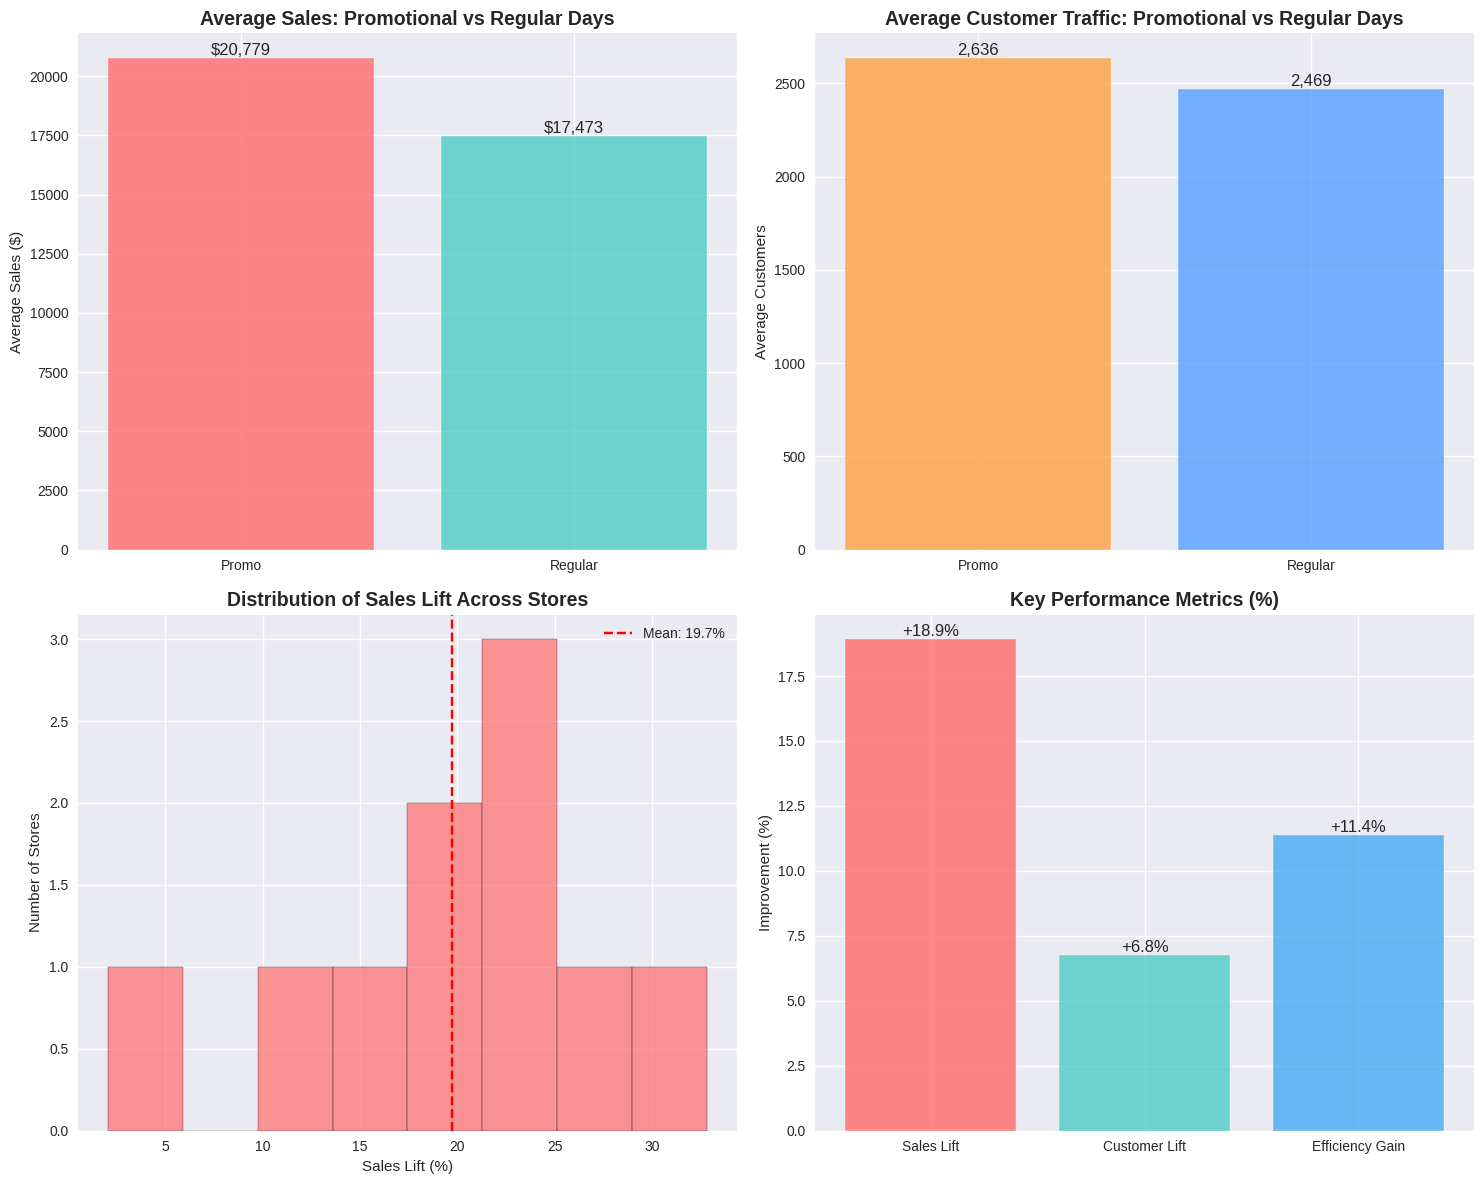

In [23]:
fig = create_promo_visualization(results, results['store_performance'])